C:\Users\Lara\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128247 (\N{CAMERA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


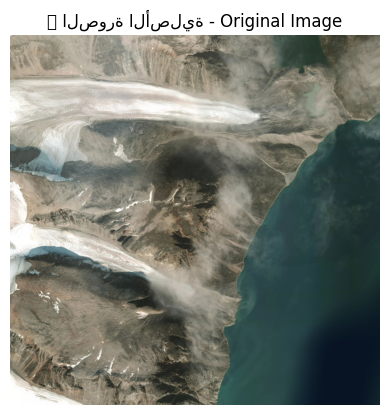


üöÄ ÿ™ÿ∑ÿ®ŸäŸÇ DCP...
‚úÖ ÿ™ŸÖÿ™ ŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑÿµŸàÿ±ÿ© Ÿàÿ≠ŸÅÿ∏Ÿáÿß ŸÅŸä: results\aoi0_dcp.png


C:\Users\Lara\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127787 (\N{FOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


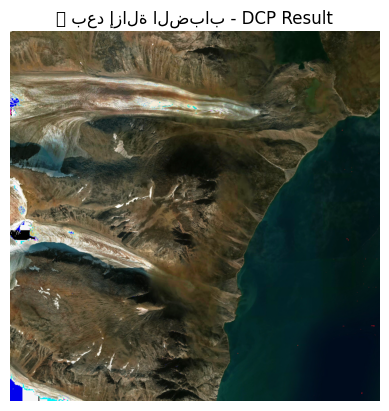


üöÄ ÿ™ÿ∑ÿ®ŸäŸÇ Retinex MSR...
‚úÖ ÿ™ŸÖ ÿ≠ŸÅÿ∏ ÿßŸÑÿµŸàÿ±ÿ© ÿßŸÑŸÖÿ≠ÿ≥ŸëŸÜÿ©: results/aoi0_msr.png


C:\Users\Lara\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


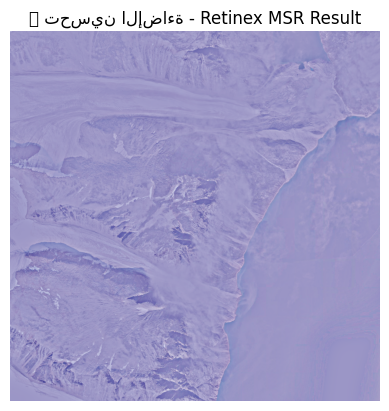


üöÄ ÿ™ÿ∑ÿ®ŸäŸÇ Retinex SSR...
‚úÖ ÿ™ŸÖ ÿ≠ŸÅÿ∏ ÿßŸÑÿµŸàÿ±ÿ© ÿßŸÑŸÖÿ≠ÿ≥ŸëŸÜÿ©: results/aoi0_ssr.png


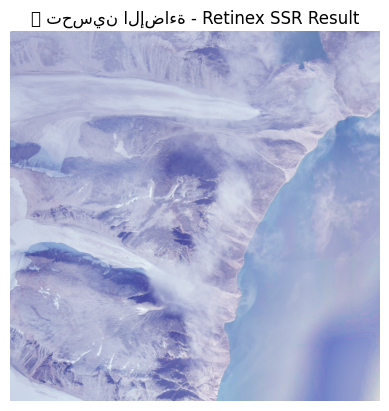

In [1]:
# ŸÖŸÑŸÅ: DehazingDemo.ipynb

# Ÿáÿ∞ÿß ÿßŸÑŸÜŸàÿ™ÿ®ŸàŸÉ Ÿäÿ≥ŸÖÿ≠ ŸÑŸÉ ÿ®ÿ™ÿ¨ÿ±ÿ®ÿ© ÿÆŸàÿßÿ±ÿ≤ŸÖŸäÿßÿ™ ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ∂ÿ®ÿßÿ® Ÿàÿ™ÿ≠ÿ≥ŸäŸÜ ÿßŸÑÿµŸàÿ± ÿπŸÑŸâ ÿµŸàÿ± ÿßŸÑÿ£ŸÇŸÖÿßÿ± ÿßŸÑÿµŸÜÿßÿπŸäÿ©

# ‚úÖ ÿßŸÑÿ™ÿ¨ÿ±ÿ®ÿ© ÿ™ÿ¥ŸÖŸÑ:
# - Dark Channel Prior (DCP)
# - Retinex (MSR Ÿà SSR)

# ‚úÖ ÿßŸÑŸÖÿ™ÿ∑ŸÑÿ®ÿßÿ™:
# pip install opencv-python numpy matplotlib


import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./src')

from dark_channel import dehaze_image
from retinex import retinex_enhance

import os

# ÿØÿßŸÑÿ© ŸÑÿπÿ±ÿ∂ ÿßŸÑÿµŸàÿ±

def show_image(img, title="Image"):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# --- ŸÖÿ´ÿßŸÑ ŸÑÿ™ÿ¨ÿ±ÿ®ÿ© DCP ---

#input_path = 'data/sample_satellite.png'  # ÿ∂ÿπ ÿßÿ≥ŸÖ ÿµŸàÿ±ÿ™ŸÉ ŸáŸÜÿß
input_path = 'data/aoi0.tif'

#output_path_dcp = 'results/sample_satellite_dcp.png'
output_path_dcp = 'results/aoi0_dcp.png'

# --- ÿ™ÿ¨ÿ±ÿ®ÿ© ÿµŸàÿ±ÿ© aoi0.tif ---

input_path = 'data/aoi0.tif'
original = cv2.imread(input_path)
show_image(original, "üì∑ ÿßŸÑÿµŸàÿ±ÿ© ÿßŸÑÿ£ÿµŸÑŸäÿ© - Original Image")


# --- ÿ™ÿ∑ÿ®ŸäŸÇ DCP ---
print("\nüöÄ ÿ™ÿ∑ÿ®ŸäŸÇ DCP...")
dehaze_image(input_path, 'results')
output_path_dcp = 'results/aoi0_dcp.png'
img_dcp = cv2.imread(output_path_dcp)
show_image(img_dcp, "üå´Ô∏è ÿ®ÿπÿØ ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ∂ÿ®ÿßÿ® - DCP Result")

# --- ÿ™ÿ∑ÿ®ŸäŸÇ Retinex MSR ---
print("\nüöÄ ÿ™ÿ∑ÿ®ŸäŸÇ Retinex MSR...")
output_path_msr = 'results/aoi0_msr.png'
retinex_enhance(input_path, output_path_msr, method="MSR")
img_msr = cv2.imread(output_path_msr)
show_image(img_msr, "‚ú® ÿ™ÿ≠ÿ≥ŸäŸÜ ÿßŸÑÿ•ÿ∂ÿßÿ°ÿ© - Retinex MSR Result")

# --- ÿ™ÿ∑ÿ®ŸäŸÇ Retinex SSR ---
print("\nüöÄ ÿ™ÿ∑ÿ®ŸäŸÇ Retinex SSR...")
output_path_ssr = 'results/aoi0_ssr.png'
retinex_enhance(input_path, output_path_ssr, method="SSR")
img_ssr = cv2.imread(output_path_ssr)
show_image(img_ssr, "‚ú® ÿ™ÿ≠ÿ≥ŸäŸÜ ÿßŸÑÿ•ÿ∂ÿßÿ°ÿ© - Retinex SSR Result")

